In [2]:
import pandas as pd
import numpy as np
import datetime as dt

from homer.base import BBGTicker
import homer.proc as proc
from adb.adb import read_symbol

from pcond import sample_sigfn,gap_moves_sigfn

C:\Users\quant\Anaconda3\envs\tyche\lib\site-packages\arctic\_util.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\quant\Anaconda3\envs\tyche\lib\site-packages\arctic\store\_pandas_ndarray_store.py:6: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import DataFrame, Series, Panel
Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'
Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'
Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'


In [3]:
start_dt = dt.date(2015, 1, 1)
wsizes = [1, 5, 10]
df = proc.enhance_ohlc(read_symbol('USDJPY CURNCY', start_dt, dt.date.today()), windows=wsizes)
df_atm_vol = proc.enhance_ohlc(read_symbol('USDJPYV1M CURNCY', start_dt, dt.date.today()), windows=wsizes)
df_25d_rr = proc.enhance_ohlc(read_symbol('USDJPY25R1M CURNCY', start_dt, dt.date.today()), windows=wsizes)

sig_df = sample_sigfn('USDJPY CURNCY',{'USDJPY CURNCY': df, 'USDJPYV1M CURNCY': df_atm_vol, 'USDJPY25R1M CURNCY': df_25d_rr})
sig_df.head()

2020-09-13 04:12:12,153 - PCond - INFO - Testing SigFn: sample_sigfn
INFO:PCond:Testing SigFn: sample_sigfn
2020-09-13 04:12:12,175 - MathUtils - INFO - Starting Dates:
 [datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1)]
INFO:MathUtils:Starting Dates:
 [datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1)]
2020-09-13 04:12:12,175 - MathUtils - INFO - Ending Dates:
 [datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1)]
INFO:MathUtils:Ending Dates:
 [datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1)]
2020-09-13 04:12:12,179 - MathUtils - WARNING - Dataframes are missing common dates:
{'USDJPY CURNCY': [],
 'USDJPY25R1M CURNCY': [datetime.date(2020, 6, 14)],
 'USDJPYV1M CURNCY': [datetime.date(2020, 6, 14)]}
{'USDJPY CURNCY': [],
 'USDJPY25R1M CURNCY': [datetime.date(2020, 6, 14)],
 'USDJPYV1M CURNCY': [datetime.date(2020, 6, 14)]}


open    high     low   close  open_close_pct_chg  high_1D  \
date                                                                      
2015-01-01  119.78  119.93  119.65  119.74           -0.033395   119.93   
2015-01-02  119.74  120.74  119.72  120.50            0.634709   120.74   
2015-01-05  120.41  120.65  119.38  119.64           -0.639482   120.65   
2015-01-06  119.64  119.64  118.06  118.39           -1.044801   119.64   
2015-01-07  118.39  119.65  118.39  119.26            0.734859   119.65   

            low_1D    1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                            ...   
2015-01-01  119.65  119.74          0.634709              0.76  ...   
2015-01-02  119.72  120.50          0.634709              0.76  ...   
2015-01-05  119.38  119.64         -0.713693             -0.86  ...   
2015-01-06  118.06  118.39         -1.044801             -1.25  ...   
2015-01-07  118.39  119.26          0.734859              0.87  ...   

            close_px_zscore_10d  close_pct_zscore_10d  close_net_zscore_10d  \
date                                                                          
2015-01-01            -2.969322              2.277683              2.233628   
2015-01-02            -2.969322              2.277683              2.233628   
2015-01-05            -2.969322              2.277683              2.233628   
2015-01-06            -2.969322              2.277683              2.233628   
2015-01-07            -2.969322              2.277683              2.233628   

            close_sharpe_10d  close_omega_10d  close_sortino_10d  \
date                                                               
2015-01-01         -0.951969         0.055444          -0.915225   
2015-01-02         -0.951969         0.055444          -0.915225   
2015-01-05         -0.951969         0.055444          -0.915225   
2015-01-06         -0.951969         0.055444          -0.915225   
2015-01-07         -0.951969         0.055444          -0.915225   

            close_num_up_10d  close_num_down_10d  UpDownRatio_10d  sig  
date                                                                    
2015-01-01               0.0                 0.1              0.0    0  
2015-01-02               0.0                 0.1              0.0    0  
2015-01-05               0.0                 0.1              0.0    0  
2015-01-06               0.0                 0.1              0.0    0  
2015-01-07               0.0                 0.1              0.0    0  

[5 rows x 65 columns]

In [4]:
from signal_utils import SignalEvaluationManager
sim = SignalEvaluationManager(sig_df, holding_periods=[1,3,5])
df = sim.holding_period_results(hp=1)

count    72.000000
mean      0.105833
std       1.157450
min      -3.940000
25%      -0.377500
50%       0.200000
75%       0.732500
max       3.630000
Name: pnl, dtype: float64
count    72.000000
mean      0.138889
std       0.997258
min      -1.000000
25%      -1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: win, dtype: float64
count    72.000000
mean      1.258194
std       1.674663
min       0.030000
25%       0.330000
50%       0.650000
75%       1.202500
max       8.350000
Name: max_gain_loss_ratio, dtype: float64


C:\Users\quant\PycharmProjects\tyche\tyche\signal_utils.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  self.avg_pnl_day: float = self.pnl / self.days_held
C:\Users\quant\PycharmProjects\tyche\tyche\signal_utils.py:61: RuntimeWarning: invalid value encountered in double_scalars
  self.avg_pnl_day: float = self.pnl / self.days_held


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

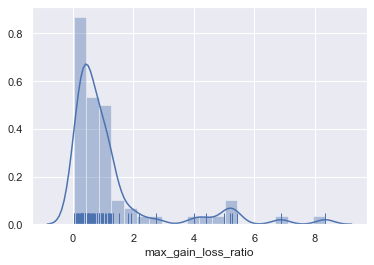

In [6]:
sns.distplot(df['max_gain_loss_ratio'], rug=True);

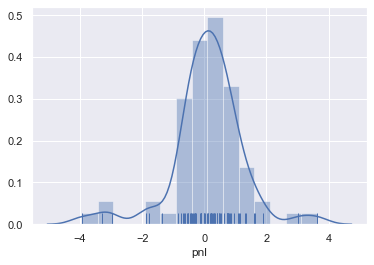

In [7]:
sns.distplot(df['pnl'],rug=True);

In [8]:
start_dt = dt.date(2020, 1, 1)
wsizes = [1, 5, 10]
df_idr = proc.enhance_ohlc(read_symbol('USDIDR CURNCY', start_dt, dt.date.today()), windows=wsizes)

sig_df_idr = gap_moves_sigfn({'USDIDR CURNCY': df_idr})
sig_df_idr.head()

2020-09-13 04:12:29,181 - PCond - INFO - Testing SigFn: gap_moves_sigfn
INFO:PCond:Testing SigFn: gap_moves_sigfn


open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-01-02  13879.0  13903.0  13879.0  13893.0            0.100872  13903.0   
2020-01-03  13885.0  13934.0  13883.0  13930.0            0.324091  13934.0   
2020-01-06  13933.0  13966.0  13933.0  13944.0            0.078949  13966.0   
2020-01-07  13934.0  13935.0  13878.0  13878.0           -0.401895  13935.0   
2020-01-08  13915.0  13938.0  13900.0  13900.0           -0.107797  13938.0   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-01-02  13879.0  13893.0               NaN               NaN  ...   
2020-01-03  13883.0  13930.0          0.266321              37.0  ...   
2020-01-06  13933.0  13944.0          0.100503              14.0  ...   
2020-01-07  13878.0  13878.0         -0.473322             -66.0  ...   
2020-01-08  13900.0  13900.0          0.158524              22.0  ...   

            close_px_zscore_10d  close_pct_zscore_10d  close_net_zscore_10d  \
date                                                                          
2020-01-02                  NaN                   NaN                   NaN   
2020-01-03                  NaN                   NaN                   NaN   
2020-01-06                  NaN                   NaN                   NaN   
2020-01-07                  NaN                   NaN                   NaN   
2020-01-08                  NaN                   NaN                   NaN   

            close_sharpe_10d  close_omega_10d  close_sortino_10d  \
date                                                               
2020-01-02               NaN              NaN                NaN   
2020-01-03               NaN              NaN                NaN   
2020-01-06               NaN              NaN                NaN   
2020-01-07               NaN              NaN                NaN   
2020-01-08               NaN              NaN                NaN   

            close_num_up_10d  close_num_down_10d  UpDownRatio_10d  sig  
date                                                                    
2020-01-02               NaN                 NaN              NaN    0  
2020-01-03               NaN                 NaN              NaN    0  
2020-01-06               NaN                 NaN              NaN    0  
2020-01-07               NaN                 NaN              NaN    0  
2020-01-08               NaN                 NaN              NaN    0  

[5 rows x 65 columns]

In [9]:
from signal_utils import SignalEvaluationManager
sim = SignalEvaluationManager(sig_df_idr, holding_periods=[1,3,5])
df_idr = sim.holding_period_results(hp=3)

count     27.000000
mean     154.000000
std      353.083668
min     -405.000000
25%     -107.500000
50%      129.000000
75%      375.000000
max      980.000000
Name: pnl, dtype: float64
count    27.000000
mean      0.111111
std       1.012739
min      -1.000000
25%      -1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: win, dtype: float64
count    27.000000
mean      1.652593
std       1.886881
min       0.000000
25%       0.340000
50%       0.930000
75%       2.290000
max       7.670000
Name: max_gain_loss_ratio, dtype: float64


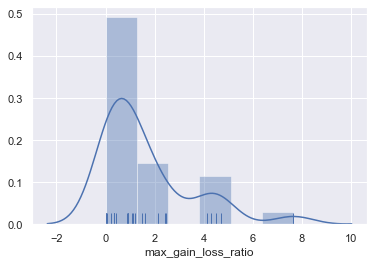

In [10]:
sns.distplot(df_idr['max_gain_loss_ratio'], rug=True);

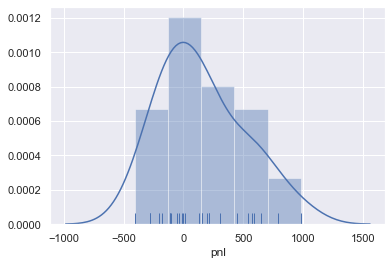

In [11]:
sns.distplot(df_idr['pnl'], rug=True);

In [1]:
start_dt = dt.date(2015, 1, 1)
wsizes = [1, 5, 10]
df = proc.enhance_ohlc(read_symbol('USDIDR CURNCY', start_dt, dt.date.today()), windows=wsizes)
df_atm_vol = proc.enhance_ohlc(read_symbol('USDIDRV1M CURNCY', start_dt, dt.date.today()), windows=wsizes)
df_25d_rr = proc.enhance_ohlc(read_symbol('USDIDR25R1M CURNCY', start_dt, dt.date.today()), windows=wsizes)

sig_df = sample_sigfn('USDIDR CURNCY',{'USDIDR CURNCY': df, 'USDIDRV1M CURNCY': df_atm_vol, 'USDIDR25R1M CURNCY': df_25d_rr})
sig_df.head()

NameError: name 'dt' is not defined

In [14]:
df

open_USDIDR CURNCY  high_USDIDR CURNCY  low_USDIDR CURNCY  \
date                                                                    
2015-01-02             12428.0             12544.0            12395.0   
2015-01-05             12545.0             12684.0            12515.0   
2015-01-06             12615.0             12674.0            12615.0   
2015-01-07             12665.0             12759.0            12665.0   
2015-01-08             12708.0             12744.0            12680.0   
...                        ...                 ...                ...   
2020-08-12             14640.0             14760.0            14640.0   
2020-08-13             14677.0             14793.0            14677.0   
2020-08-14             14799.0             14869.0            14795.0   
2020-08-18             14763.0             14875.0            14750.0   
2020-08-19             14750.0             14790.0            14750.0   

            close_USDIDR CURNCY  open_close_pct_chg_USDIDR CURNCY  \
date                                                                
2015-01-02              12543.0                          0.925330   
2015-01-05              12630.0                          0.677561   
2015-01-06              12658.0                          0.340864   
2015-01-07              12739.0                          0.584287   
2015-01-08              12683.0                         -0.196726   
...                         ...                               ...   
2020-08-12              14760.0                          0.819672   
2020-08-13              14775.0                          0.667711   
2020-08-14              14795.0                         -0.027029   
2020-08-18              14845.0                          0.555443   
2020-08-19              14773.0                          0.155932   

            high_1D_USDIDR CURNCY  low_1D_USDIDR CURNCY  1DMA_USDIDR CURNCY  \
date                                                                          
2015-01-02                12544.0               12395.0             12543.0   
2015-01-05                12684.0               12515.0             12630.0   
2015-01-06                12674.0               12615.0             12658.0   
2015-01-07                12759.0               12665.0             12739.0   
2015-01-08                12744.0               12680.0             12683.0   
...                           ...                   ...                 ...   
2020-08-12                14760.0               14640.0             14760.0   
2020-08-13                14793.0               14677.0             14775.0   
2020-08-14                14869.0               14795.0             14795.0   
2020-08-18                14875.0               14750.0             14845.0   
2020-08-19                14790.0               14750.0             14773.0   

            close_pct_chg_1d_USDIDR CURNCY  close_net_chg_1d_USDIDR CURNCY  \
date                                                                         
2015-01-02                             NaN                             NaN   
2015-01-05                        0.693614                            87.0   
2015-01-06                        0.221694                            28.0   
2015-01-07                        0.639912                            81.0   
2015-01-08                       -0.439595                           -56.0   
...                                    ...                             ...   
2020-08-12                        0.544959                            80.0   
2020-08-13                        0.101626                            15.0   
2020-08-14                        0.135364                            20.0   
2020-08-18                        0.337952                            50.0   
2020-08-19                       -0.485012                           -72.0   

            ...  days_above_10dma_USDIDR CURNCY  \
date        ...                                   
2015-01-02  ...    

In [18]:
df.head()

open_USDIDR CURNCY  high_USDIDR CURNCY  low_USDIDR CURNCY  \
date                                                                    
2015-01-02             12428.0             12544.0            12395.0   
2015-01-05             12545.0             12684.0            12515.0   
2015-01-06             12615.0             12674.0            12615.0   
2015-01-07             12665.0             12759.0            12665.0   
2015-01-08             12708.0             12744.0            12680.0   

            close_USDIDR CURNCY  open_close_pct_chg_USDIDR CURNCY  \
date                                                                
2015-01-02              12543.0                          0.925330   
2015-01-05              12630.0                          0.677561   
2015-01-06              12658.0                          0.340864   
2015-01-07              12739.0                          0.584287   
2015-01-08              12683.0                         -0.196726   

            high_1D_USDIDR CURNCY  low_1D_USDIDR CURNCY  1DMA_USDIDR CURNCY  \
date                                                                          
2015-01-02                12544.0               12395.0             12543.0   
2015-01-05                12684.0               12515.0             12630.0   
2015-01-06                12674.0               12615.0             12658.0   
2015-01-07                12759.0               12665.0             12739.0   
2015-01-08                12744.0               12680.0             12683.0   

            close_pct_chg_1d_USDIDR CURNCY  close_net_chg_1d_USDIDR CURNCY  \
date                                                                         
2015-01-02                             NaN                             NaN   
2015-01-05                        0.693614                            87.0   
2015-01-06                        0.221694                            28.0   
2015-01-07                        0.639912                            81.0   
2015-01-08                       -0.439595                           -56.0   

            ...  days_above_10dma_USDIDR CURNCY  \
date        ...                                   
2015-01-02  ...                              -1   
2015-01-05  ...                               1   
2015-01-06  ...                               2   
2015-01-07  ...                               3   
2015-01-08  ...                               4   

            close_px_zscore_10d_USDIDR CURNCY  \
date                                            
2015-01-02                                NaN   
2015-01-05                                NaN   
2015-01-06                                NaN   
2015-01-07                                NaN   
2015-01-08                                NaN   

            close_pct_zscore_10d_USDIDR CURNCY  \
date                                             
2015-01-02                                 NaN   
2015-01-05                                 NaN   
2015-01-06                                 NaN   
2015-01-07                                 NaN   
2015-01-08                                 NaN   

            close_net_zscore_10d_USDIDR CURNCY  \
date                                             
2015-01-02                                 NaN   
2015-01-05                                 NaN   
2015-01-06                                 NaN   
2015-01-07                                 NaN   
2015-01-08                                 NaN   

            close_sharpe_10d_USDIDR CURNCY  close_omega_10d_USDIDR CURNCY  \
date                                                                        
2015-01-02                             NaN                            NaN   
2015-01-05                             NaN                            NaN   
2015-01-06                             NaN                            NaN   
2015-01-07                             NaN                            NaN   
2015-01-08                             NaN       

In [22]:
df_atm_vol.tail()

open_USDIDRV1M CURNCY  high_USDIDRV1M CURNCY  \
date                                                       
2020-08-17                11.0100                11.1300   
2020-08-18                10.7500                10.7975   
2020-08-19                10.5800                10.7950   
2020-08-20                10.7000                10.9100   
2020-08-21                10.8425                10.8675   

            low_USDIDRV1M CURNCY  close_USDIDRV1M CURNCY  \
date                                                       
2020-08-17                10.600                  10.770   
2020-08-18                10.500                  10.505   
2020-08-19                10.565                  10.695   
2020-08-20                10.700                  10.855   
2020-08-21                10.680                  10.770   

            open_close_pct_chg_USDIDRV1M CURNCY  high_1D_USDIDRV1M CURNCY  \
date                                                                        
2020-08-17                            -2.179837                   11.1300   
2020-08-18                            -2.279070                   10.7975   
2020-08-19                             1.086957                   10.7950   
2020-08-20                             1.448598                   10.9100   
2020-08-21                            -0.668665                   10.8675   

            low_1D_USDIDRV1M CURNCY  1DMA_USDIDRV1M CURNCY  \
date                                                         
2020-08-17                   10.600                 10.770   
2020-08-18                   10.500                 10.505   
2020-08-19                   10.565                 10.695   
2020-08-20                   10.700                 10.855   
2020-08-21                   10.680                 10.770   

            close_pct_chg_1d_USDIDRV1M CURNCY  \
date                                            
2020-08-17                          -0.231589   
2020-08-18                          -2.460539   
2020-08-19                           1.808663   
2020-08-20                           1.496026   
2020-08-21                          -0.783049   

            close_net_chg_1d_USDIDRV1M CURNCY  ...  \
date                                           ...   
2020-08-17                             -0.025  ...   
2020-08-18                             -0.265  ...   
2020-08-19                              0.190  ...   
2020-08-20                              0.160  ...   
2020-08-21                             -0.085  ...   

            days_above_10dma_USDIDRV1M CURNCY  \
date                                            
2020-08-17                                 -8   
2020-08-18                                 -9   
2020-08-19                                -10   
2020-08-20                                  1   
2020-08-21                                  2   

            close_px_zscore_10d_USDIDRV1M CURNCY  \
date                                               
2020-08-17                             -0.685704   
2020-08-18                             -2.680198   
2020-08-19                             -0.654698   
2020-08-20                              0.934944   
2020-08-21                              0.097493   

            close_pct_zscore_10d_USDIDRV1M CURNCY  \
date                                                
2020-08-17                              -0.080653   
2020-08-18                              -1.390786   
2020-08-19                               1.336486   
2020-08-20                               1.225266   
2020-08-21                              -0.631007   

            close_net_zscore_10d_USDIDRV1M CURNCY  \
date                                                
2020-08-17                              -0.070582   
2020-08-18                              -1.352485   
2020-08-19                               1.297212   
2020-08-20                               1.219836   
2020-08-21                              -0.631157   

            close_s

In [21]:
df_25d_rr.tail()

open_USDIDR25R1M CURNCY  high_USDIDR25R1M CURNCY  \
date                                                           
2020-08-17                   2.4000                   2.4200   
2020-08-18                   2.2725                   2.2725   
2020-08-19                   2.1950                   2.1950   
2020-08-20                   2.0875                   2.1300   
2020-08-21                   2.0550                   2.1600   

            low_USDIDR25R1M CURNCY  close_USDIDR25R1M CURNCY  \
date                                                           
2020-08-17                  2.1825                    2.1950   
2020-08-18                  2.1500                    2.1525   
2020-08-19                  2.0850                    2.0875   
2020-08-20                  2.0250                    2.0525   
2020-08-21                  1.9725                    2.1600   

            open_close_pct_chg_USDIDR25R1M CURNCY  high_1D_USDIDR25R1M CURNCY  \
date                                                                            
2020-08-17                              -8.541667                      2.4200   
2020-08-18                              -5.280528                      2.2725   
2020-08-19                              -4.897494                      2.1950   
2020-08-20                              -1.676647                      2.1300   
2020-08-21                               5.109489                      2.1600   

            low_1D_USDIDR25R1M CURNCY  1DMA_USDIDR25R1M CURNCY  \
date                                                             
2020-08-17                     2.1825                   2.1950   
2020-08-18                     2.1500                   2.1525   
2020-08-19                     2.0850                   2.0875   
2020-08-20                     2.0250                   2.0525   
2020-08-21                     1.9725                   2.1600   

            close_pct_chg_1d_USDIDR25R1M CURNCY  \
date                                              
2020-08-17                            -4.252999   
2020-08-18                            -1.936219   
2020-08-19                            -3.019744   
2020-08-20                            -1.676647   
2020-08-21                             5.237515   

            close_net_chg_1d_USDIDR25R1M CURNCY  ...  \
date                                             ...   
2020-08-17                              -0.0975  ...   
2020-08-18                              -0.0425  ...   
2020-08-19                              -0.0650  ...   
2020-08-20                              -0.0350  ...   
2020-08-21                               0.1075  ...   

            days_above_10dma_USDIDR25R1M CURNCY  \
date                                              
2020-08-17                                    3   
2020-08-18                                    4   
2020-08-19                                   -1   
2020-08-20                                   -2   
2020-08-21                                    1   

            close_px_zscore_10d_USDIDR25R1M CURNCY  \
date                                                 
2020-08-17                                1.253193   
2020-08-18                                0.460745   
2020-08-19                               -0.466621   
2020-08-20                               -0.993655   
2020-08-21                                0.489595   

            close_pct_zscore_10d_USDIDR25R1M CURNCY  \
date                                                  
2020-08-17                                -1.633593   
2020-08-18                                -0.666732   
2020-08-19                                -0.862455   
2020-08-20                                -0.494897   
2020-08-21                                 1.353198   

            close_net_zscore_10d_USDIDR25R1M CURNCY  \
date                                                  
2020-08-17                                -1.733900   
2020-08-18                                -0

In [25]:
print(list(df_25d_rr.index.values))

[numpy.datetime64('2015-01-01T00:00:00.000000000'), numpy.datetime64('2015-01-02T00:00:00.000000000'), numpy.datetime64('2015-01-05T00:00:00.000000000'), numpy.datetime64('2015-01-06T00:00:00.000000000'), numpy.datetime64('2015-01-07T00:00:00.000000000'), numpy.datetime64('2015-01-08T00:00:00.000000000'), numpy.datetime64('2015-01-09T00:00:00.000000000'), numpy.datetime64('2015-01-12T00:00:00.000000000'), numpy.datetime64('2015-01-13T00:00:00.000000000'), numpy.datetime64('2015-01-14T00:00:00.000000000'), numpy.datetime64('2015-01-15T00:00:00.000000000'), numpy.datetime64('2015-01-16T00:00:00.000000000'), numpy.datetime64('2015-01-19T00:00:00.000000000'), numpy.datetime64('2015-01-20T00:00:00.000000000'), numpy.datetime64('2015-01-21T00:00:00.000000000'), numpy.datetime64('2015-01-22T00:00:00.000000000'), numpy.datetime64('2015-01-23T00:00:00.000000000'), numpy.datetime64('2015-01-26T00:00:00.000000000'), numpy.datetime64('2015-01-27T00:00:00.000000000'), numpy.datetime64('2015-01-28T0